In [1]:
# 1. Import library yang diperlukan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [2]:
# 2. Baca file CSV 
file_path = r'C:\Users\USER1\Downloads\Indonesian Marketplace Product Reviews\reviews.csv'
df = pd.read_csv(file_path, engine='python')


In [3]:

# 3. Tampilkan nama kolom dan data awal
print("Nama kolom:", df.columns)
print(df.head())



Nama kolom: Index(['reviews', 'label'], dtype='object')
                                             reviews  label
0  kemeja nya bagusss bgtttt😍😍😍aaaa mauuu nngisss...    1.0
1  Jahitannya sih rapi,cuman ada benang yang ikut...    0.0
2  Sesuai harga. Agak tipis tapi masih oke kok. W...    0.0
3  Wah gila sihhh sebagus itu, se worth it, se  l...    1.0
4  Kain nya bagus halus  \nTapi kok di bukak koto...    0.0


In [4]:
# 4. Pastikan hanya menggunakan dua kolom: 'reviews' dan 'label'
df = df[['reviews', 'label']].dropna()


In [5]:
# 5. Bersihkan teks (lowercase, hapus simbol, dll)
df['reviews'] = df['reviews'].str.lower()
df['reviews'] = df['reviews'].str.replace(r'[^a-zA-Z\s]', '', regex=True)

In [6]:
# 6. Siapkan fitur dan label
X = df['reviews']
y = df['label'].astype(int)  # ubah label ke integer


In [7]:
# 7. TF-IDF vektorisasi teks
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

In [8]:
# 8. Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [9]:
# 9. Latih model Multinomial Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [10]:
# 10. Prediksi dan evaluasi
y_pred = model.predict(X_test)

print("\n=== Evaluasi Model ===")
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))


=== Evaluasi Model ===
Akurasi: 0.9161676646706587

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92        84
           1       1.00      0.83      0.91        83

    accuracy                           0.92       167
   macro avg       0.93      0.92      0.92       167
weighted avg       0.93      0.92      0.92       167



Confusion Matrix:
 [[84  0]
 [14 69]]


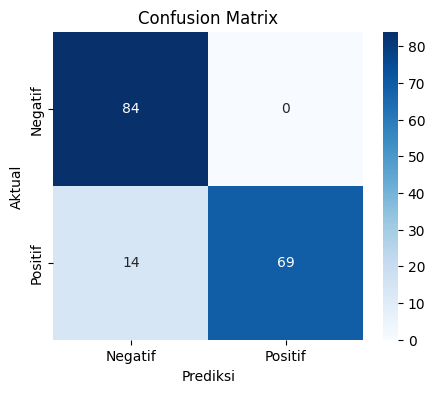

In [11]:
# Tambahan: Confusion Matrix (angka)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Tambahan: Visualisasi Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()